In [2]:
install.packages(c("matrixStats", "Hmisc", "splines", "foreach", "doParallel", "fastcluster", "dynamicTreeCut", "survival")) 
source("http://bioconductor.org/biocLite.R") 
biocLite(c("GO.db", "preprocessCore", "impute")) 

Installing packages into ‘/usr/local/lib/R/3.3/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘splines’ is not available (for R version 3.3.0)”Warning message:
“package ‘splines’ is a base package, and should not be updated”Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.0 (2016-05-03).
Installing package(s) ‘GO.db’, ‘preprocessCore’, ‘impute’
Old packages: 'acepack', 'chron', 'colorspace', 'data.table', 'reshape2',
  'RSQLite', 'stringi', 'stringr', 'cluster', 'codetools', 'foreign',
  'lattice', 'Matrix', 'mgcv', 'nlme', 'survival'


In [3]:
install.packages('WGCNA')

Installing package into ‘/usr/local/lib/R/3.3/site-library’
(as ‘lib’ is unspecified)


In [33]:
#=====================================================================================
#
#  Code chunk 1
#
#=====================================================================================


# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored. 
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir); 
# Load the WGCNA package
library(WGCNA);
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
#Read in the female liver data set
femData = read.csv("GSE90056_ecoli_heatshock_normalizedcounts.txt", sep='\t');
# Take a quick look at what is in the data set:
dim(femData);
names(femData);

[1] "/Users/peter/projects/rexwork/FemaleLiver-Data"

[1] 4192   37

[1] "gene"                              "ecoli_k12_pBAD_30C_f_1"           
 [3] "ecoli_k12_pBAD_30C_m_1"            "ecoli_k12_pBADsigma32wt_30C_f_1"  
 [5] "ecoli_k12_pBADsigma32wt_30C_m_1"   "ecoli_k12_30C_f_1"                
 [7] "ecoli_k12_30C_m_1"                 "ecoli_k12_42C_10min_f_1"          
 [9] "ecoli_k12_42C_10min_m_1"           "ecoli_k12_42C_20min_f_1"          
[11] "ecoli_k12_42C_20min_m_1"           "ecoli_k12_pBad_30C_f_2"           
[13] "ecoli_k12_pBAD_30C_m_2"            "ecoli_k12_pBADsigma32wt_30C_f_2"  
[15] "ecoli_k12_pBADsigma32wt_30C_m_2"   "ecoli_k12_pBAD_30C_f_3"           
[17] "ecoli_k12_pBAD_30C_m_3"            "ecoli_k12_pBADsigma32wt_30C_f_3"  
[19] "ecoli_k12_pBADsigma32wt_30C_m_3"   "ecoli_k12_30C_f_2"                
[21] "ecoli_k12_30C_m_2"                 "ecoli_k12_42C_10min_f_2"          
[23] "ecoli_k12_42C_10min_m_2"           "ecoli_k12_42C_20min_f_2"          
[25] "ecoli_k12_42C_20min_m_2"           "ecoli_k12_30C_f_3"                
[27] "ecoli_k12_30C_m_3"                 "ecoli_k12_42C_10min_f_3"          
[29] "ecoli_k12_42C_10min_m_3"           "ecoli_k12_42C_20min_f_3"          
[31] "ecoli_k12_42C_20min_m_3"           "ecoli_k12_pBAD_30C_f_4"           
[33] "ecoli_k12_pBAD_30C_m_4"            "ecoli_k12_pBADsigma32I54N_30C_f_1"
[35] "ecoli_k12_pBADsigma32I54N_30C_m_1" "ecoli_k12_pBADsigma32I54N_30C_f_2"
[37] "ecoli_k12_pBADsigma32I54N_30C_m_2"

In [34]:



#=====================================================================================
#
#  Code chunk 2
#
#=====================================================================================


datExpr0 = as.data.frame(t(femData[, -c(1:1)]));
names(datExpr0) = femData$gene;
rownames(datExpr0) = names(femData)[-c(1:1)];

In [35]:
datExpr0

,aaeA,aaeB,aaeR,aaeX,aas,aat,abgA,abgB,abgR,abgT,⋯,zntR,znuA,znuB,znuC,zraP,zraR,zraS,zupT,zur,zwf
ecoli_k12_pBAD_30C_f_1,2.1132922,1.6698015,31.80164,3.221735,54.92163,14.915946,2.0052903,1.8180744,9.037870,0.8608171,⋯,42.42707,1850.53958,54.769491,132.14226,1.542803,4.708689,1.645435,38.63584,60.50118,564.6156
ecoli_k12_pBAD_30C_m_1,6.6195724,7.8456061,33.20463,15.137405,28.59288,17.520741,0.0000000,0.0000000,0.000000,8.0891435,⋯,36.24449,599.07131,35.359128,126.62559,7.248898,34.932472,8.835567,63.83526,53.86100,269.8888
ecoli_k12_pBADsigma32wt_30C_f_1,4.9991378,1.4220108,35.10685,0.000000,57.87057,17.201289,1.0673216,1.2902339,7.696692,0.9163449,⋯,44.89014,7083.77821,121.055457,251.10153,2.189763,5.276239,2.335434,57.85049,70.50528,515.7159
ecoli_k12_pBADsigma32wt_30C_m_1,8.1152703,4.3969496,36.05499,0.000000,46.07026,26.082331,2.4751707,2.9921151,2.379867,0.7083494,⋯,71.09434,2671.08324,152.752042,223.19754,5.078167,13.867302,8.510834,53.10424,50.30928,322.4430
ecoli_k12_30C_f_1,1.6694265,1.7807640,42.28900,2.863189,36.05498,10.218133,3.4157345,1.7503868,8.139143,0.7650172,⋯,37.93390,303.83562,14.614650,37.34265,3.199244,9.397134,5.152921,83.26184,236.57933,622.3440
ecoli_k12_30C_m_1,3.3751141,5.0288612,38.69716,2.205169,47.90117,33.180757,1.0294153,1.2444108,9.897789,2.6514018,⋯,39.07187,108.48581,23.465693,30.34733,1.055996,20.355407,12.871373,88.34352,137.74614,288.3214
ecoli_k12_42C_10min_f_1,4.6758494,2.0912752,54.96357,4.438424,30.52425,16.696030,3.5788084,1.4800328,3.622116,0.9702860,⋯,56.61406,216.41242,9.739276,30.48615,5.216995,14.711979,5.652367,74.97465,115.01430,616.7868
ecoli_k12_42C_10min_m_1,4.6310477,6.2487648,49.31893,3.258497,31.85181,22.629224,3.2957800,1.6089676,3.656400,1.5236196,⋯,41.35079,71.95936,17.337196,27.69723,6.241629,41.107198,15.928878,70.85337,103.05945,268.1902
ecoli_k12_42C_20min_f_1,2.7515826,1.4784164,51.25252,6.711704,21.94820,16.750698,3.7858923,2.0121186,4.518771,0.7845704,⋯,50.62137,165.27840,14.371243,29.31709,7.030746,14.326906,5.692706,84.35805,99.83659,565.2189
ecoli_k12_42C_20min_m_1,7.1829579,5.1566505,49.82523,6.570294,28.72157,32.048655,2.4829224,2.1186958,5.898086,2.3824922,⋯,42.25082,58.28457,20.463205,29.63337,2.696861,36.100516,16.024911,74.21594,70.87623,270.3512


 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

clust
 1  2 
19 17 

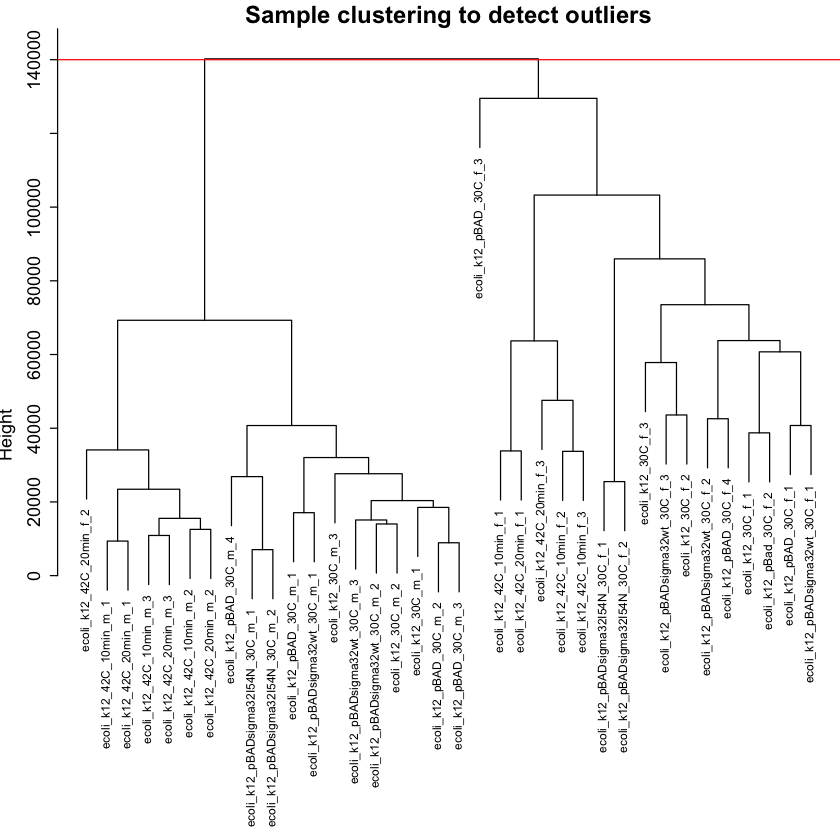

In [39]:


#=====================================================================================
#
#  Code chunk 3
#
#=====================================================================================


gsg = goodSamplesGenes(datExpr0, verbose = 3);
gsg$allOK


#=====================================================================================
#
#  Code chunk 4
#
#=====================================================================================


if (!gsg$allOK)
{
  # Optionally, print the gene and sample names that were removed:
  if (sum(!gsg$goodGenes)>0) 
     printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
  if (sum(!gsg$goodSamples)>0) 
     printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
  # Remove the offending genes and samples from the data:
  datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}


#=====================================================================================
#
#  Code chunk 5
#
#=====================================================================================


sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.
#sizeGrWindow(12,9)
#pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5, 
     cex.axis = 1.5, cex.main = 2)


#=====================================================================================
#
#  Code chunk 6
#
#=====================================================================================


# Plot a line to show the cut
cutHeight = 140000
abline(h = cutHeight, col = "red");
# Determine cluster under the line
clust = cutreeStatic(sampleTree, cutHeight = cutHeight, minSize = 10)
table(clust)
# clust 1 contains the samples we want to keep.
keepSamples = (clust==1)
datExpr = datExpr0[keepSamples, ]
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)


save(datExpr, file = "FemaleLiver-01-dataInput.RData")


In [40]:
#=====================================================================================
#
#  Code chunk 1
#
#=====================================================================================


# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored. 
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir); 
# Load the WGCNA package
library(WGCNA)
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
# Allow multi-threading within WGCNA. This helps speed up certain calculations.
# At present this call is necessary for the code to work.
# Any error here may be ignored but you may want to update WGCNA if you see one.
# Caution: skip this line if you run RStudio or other third-party R environments. 
# See note above.
#enableWGCNAThreads()
# Load the data saved in the first part
lnames = load(file = "FemaleLiver-01-dataInput.RData");
#The variable lnames contains the names of loaded variables.
lnames

[1] "/Users/peter/projects/rexwork/FemaleLiver-Data"

[1] "datExpr"

pickSoftThreshold: will use block size 4191.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4191 of 4191
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.178  0.604          0.825 1380.00   1400.00 2120.0
2      2    0.211 -0.377          0.749  665.00    648.00 1360.0
3      3    0.590 -0.675          0.861  380.00    345.00  962.0
4      4    0.719 -0.878          0.897  241.00    201.00  733.0
5      5    0.761 -1.010          0.906  163.00    123.00  581.0
6      6    0.769 -1.120          0.906  116.00     78.60  473.0
7      7    0.780 -1.190          0.916   86.10     52.40  393.0
8      8    0.802 -1.230          0.933   65.50     36.20  331.0
9      9    0.818 -1.260          0.944   51.10     25.50  283.0
10    10    0.815 -1.290          0.946   40.60     18.20  244.0
11    12    0.821 -1.330          0.955   26.90      9.85  186.0
12    14    0.821 -1.360          0.957   18.70      5.63  145.0


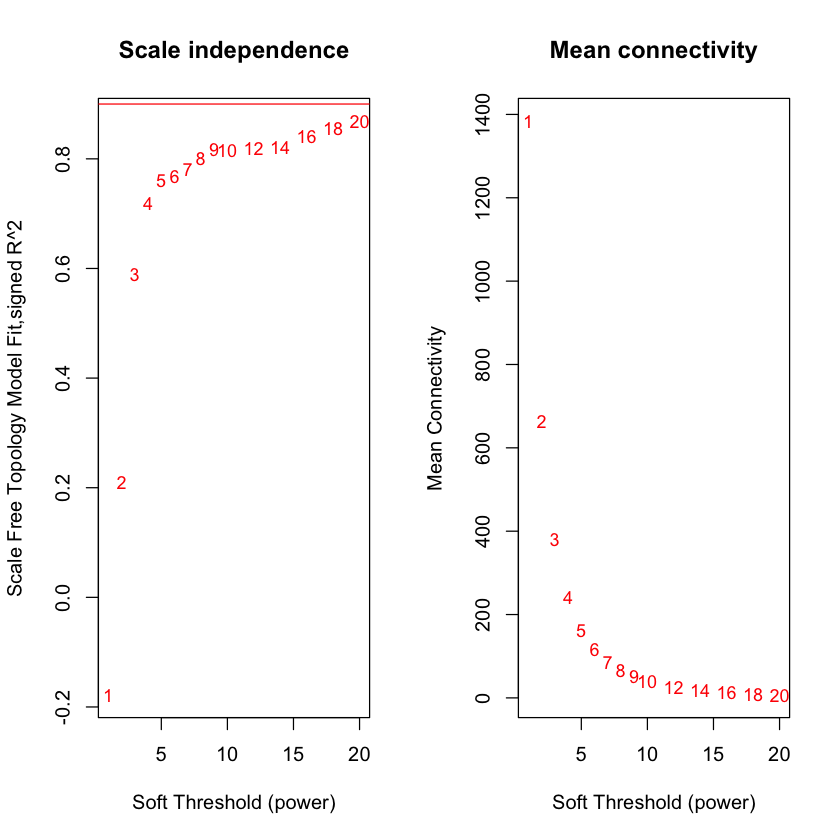

In [41]:



#=====================================================================================
#
#  Code chunk 2
#
#=====================================================================================


# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
# sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
adjacency: replaceMissing: 0
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file femaleMouseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking modules for statistical meaningfulness..
     ..removing 22 genes from module 1 because their KME is too low.
     ..removing 34 genes from module 2 because their KME is too low.
     ..removing 28 genes from module 3 because their KME is too low.
     ..removing 12 genes from module 4 because their KME is too low.
     ..removing 7 genes from module 5 because their KME is too low.
     ..removing 3 genes from module 6 because their KME is too low.
   

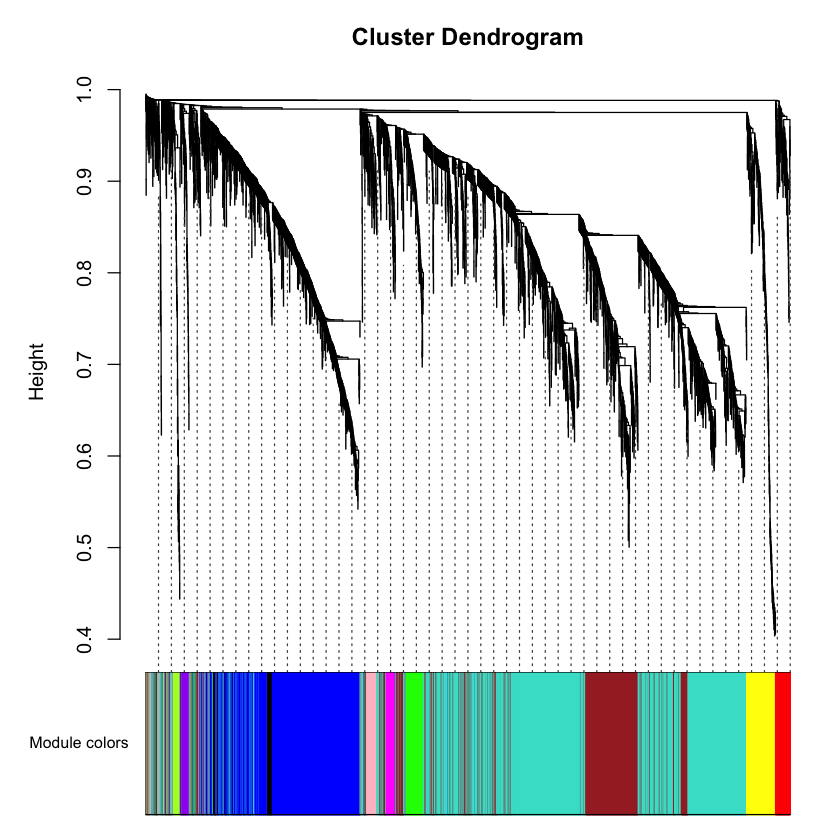

In [42]:



#=====================================================================================
#
#  Code chunk 3
#
#=====================================================================================


net = blockwiseModules(datExpr, power = 6,
                       TOMType = "unsigned", minModuleSize = 30,
                       reassignThreshold = 0, mergeCutHeight = 0.25,
                       numericLabels = TRUE, pamRespectsDendro = FALSE,
                       saveTOMs = TRUE,
                       saveTOMFileBase = "femaleMouseTOM", 
                       verbose = 3)


#=====================================================================================
#
#  Code chunk 4
#
#=====================================================================================


# open a graphics window
#sizeGrWindow(12, 9)
# Convert labels to colors for plotting
mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
                    "Module colors",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)


#=====================================================================================
#
#  Code chunk 5
#
#=====================================================================================


moduleLabels = net$colors
moduleColors = labels2colors(net$colors)
MEs = net$MEs;
geneTree = net$dendrograms[[1]];
save(MEs, moduleLabels, moduleColors, geneTree, 
     file = "FemaleLiver-02-networkConstruction-auto.RData")


In [43]:
# Recalculate topological overlap if needed
TOM = TOMsimilarityFromExpr(datExpr, power = 6);
# Read in the annotation file
annot = read.csv(file = "GeneAnnotation.csv");
# Select modules#
#modules = c("brown", "red", "yellow", "blue", "green", "turquoise");
modules = unique(moduleColors)
# Select module probes
probes = names(datExpr)
inModule = is.finite(match(moduleColors, modules));
modProbes = probes[inModule];
modGenes = annot$gene_symbol[match(modProbes, annot$substanceBXH)];
# Select the corresponding Topological Overlap
modTOM = TOM[inModule, inModule];
dimnames(modTOM) = list(modProbes, modProbes)
# Export the network into edge and node list files Cytoscape can read
cyt = exportNetworkToCytoscape(modTOM,
  edgeFile = paste("CytoscapeInput-edges", ".txt", sep=""),
  nodeFile = paste("CytoscapeInput-nodes", ".txt", sep=""),
  weighted = TRUE,
  threshold = 0.02,
  nodeNames = modProbes,
  altNodeNames = modGenes,
  nodeAttr = moduleColors[inModule]);


TOM calculation: adjacency..
adjacency: replaceMissing: 0
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication..
..normalization..
..done.


In [44]:
unique(moduleColors)

[1] "turquoise"   "blue"        "yellow"      "red"         "pink"       
 [6] "green"       "black"       "magenta"     "brown"       "grey"       
[11] "greenyellow" "purple"